In [96]:
import pandas as pd
from datetime import datetime

In [97]:
n = 1440 * 40

In [98]:

url = f'http://jaguar40589.jaguariotmeters.net/cgi-bin/egauge-show?m&n={n}&c'
df = pd.read_csv(url)

In [122]:
df.to_csv('egauge-show.csv', sep=',')

In [99]:
df.head()

,Date & Time,Usage [kWh],Generation [kWh],Main 유효전력 [kWh],Main 피상전력* [kVAh],Main 무효전력 [kvahr],역률 [s],cost [₩]
0,1630166700,4567.197763,0.0,4567.197763,7417.191587,5426.870488,1.535009e+07,9.560962e+06
1,1630166640,4567.194196,0.0,4567.194196,7417.181500,5426.861053,1.535006e+07,9.560961e+06
2,1630166580,4567.190474,0.0,4567.190474,7417.171221,5426.851473,1.535004e+07,9.560961e+06
3,1630166520,4567.186344,0.0,4567.186344,7417.160317,5426.841382,1.535002e+07,9.560960e+06
4,1630166460,4567.181042,0.0,4567.181042,7417.148403,5426.830862,1.534999e+07,9.560960e+06


In [100]:
df.describe()

,Date & Time,Usage [kWh],Generation [kWh],Main 유효전력 [kWh],Main 피상전력* [kVAh],Main 무효전력 [kvahr],역률 [s],cost [₩]
count,5.760000e+04,57600.000000,57600.0,57600.000000,57600.000000,57600.000000,5.760000e+04,5.760000e+04
mean,1.628439e+09,4280.394259,0.0,4280.394259,6954.223724,5082.077805,1.442891e+07,9.331060e+06
std,9.976699e+05,160.234128,0.0,160.234128,262.636535,197.614990,5.214908e+05,2.998662e+05
min,1.626711e+09,3989.351952,0.0,3989.351952,6486.346419,4734.601945,1.350554e+07,8.882175e+06
25%,1.627575e+09,4159.789269,0.0,4159.789269,6743.830794,4917.785269,1.400305e+07,8.902658e+06
50%,1.628439e+09,4254.392169,0.0,4254.392169,6929.486078,5071.945727,1.439236e+07,9.523369e+06
75%,1.629303e+09,4416.672735,0.0,4416.672735,7179.620509,5252.544477,1.487584e+07,9.542872e+06
max,1.630167e+09,4567.197763,0.0,4567.197763,7417.191587,5426.870488,1.535009e+07,9.560962e+06


In [131]:
df2 = df.iloc[:, [0, 3]].copy()
df2['Time'] = pd.to_datetime(df['Date & Time'],unit='s')

In [132]:
df2.head()

,Date & Time,Main 유효전력 [kWh],Time
0,1630166700,4567.197763,2021-08-28 16:05:00
1,1630166640,4567.194196,2021-08-28 16:04:00
2,1630166580,4567.190474,2021-08-28 16:03:00
3,1630166520,4567.186344,2021-08-28 16:02:00
4,1630166460,4567.181042,2021-08-28 16:01:00


In [133]:
df2['Time'].dt.tz_localize('UTC').dt.tz_convert('Asia/Seoul')

0       2021-08-29 01:05:00+09:00
1       2021-08-29 01:04:00+09:00
2       2021-08-29 01:03:00+09:00
3       2021-08-29 01:02:00+09:00
4       2021-08-29 01:01:00+09:00
                   ...           
57595   2021-07-20 01:10:00+09:00
57596   2021-07-20 01:09:00+09:00
57597   2021-07-20 01:08:00+09:00
57598   2021-07-20 01:07:00+09:00
57599   2021-07-20 01:06:00+09:00
Name: Time, Length: 57600, dtype: datetime64[ns, Asia/Seoul]

In [103]:
df2.dtypes

Date & Time                 int64
Main 유효전력 [kWh]           float64
Time               datetime64[ns]
dtype: object

In [134]:
# time 필드를 index로 만들고 필드 삭제
df2.set_index('Time', inplace=True)

In [141]:
df2.sort_index(ascending=True, inplace=True)

In [142]:
df2.head()

,Date & Time,Main 유효전력 [kWh]
Time,,
2021-07-19 16:06:00,1626710760,3989.351952
2021-07-19 16:07:00,1626710820,3989.357041
2021-07-19 16:08:00,1626710880,3989.362111
2021-07-19 16:09:00,1626710940,3989.367271
2021-07-19 16:10:00,1626711000,3989.372429


In [143]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 57600 entries, 2021-07-19 16:06:00 to 2021-08-28 16:05:00
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date & Time      57600 non-null  int64  
 1   Main 유효전력 [kWh]  57600 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 1.3 MB


In [144]:
df2.drop('Date & Time', axis=1)

,Main 유효전력 [kWh]
Time,
2021-07-19 16:06:00,3989.351952
2021-07-19 16:07:00,3989.357041
2021-07-19 16:08:00,3989.362111
2021-07-19 16:09:00,3989.367271
2021-07-19 16:10:00,3989.372429
...,...
2021-08-28 16:01:00,4567.181042
2021-08-28 16:02:00,4567.186344
2021-08-28 16:03:00,4567.190474


In [145]:
df2.head()

,Date & Time,Main 유효전력 [kWh]
Time,,
2021-07-19 16:06:00,1626710760,3989.351952
2021-07-19 16:07:00,1626710820,3989.357041
2021-07-19 16:08:00,1626710880,3989.362111
2021-07-19 16:09:00,1626710940,3989.367271
2021-07-19 16:10:00,1626711000,3989.372429


In [146]:
df2.rename(columns = {'Main 유효전력 [kWh]': 'Energy'}, inplace = True)

In [147]:
df2.to_csv('time_energy.csv', sep=',')

In [148]:
df3 = df2.resample('6H').last()

In [111]:
df3['Delta'] = df3['Energy'] - df3['Energy'].shift(1)

In [112]:
df3.head()

,Date & Time,Energy,Delta
Time,,,
2021-07-19 12:00:00,1626717540,3989.844182,NaN
2021-07-19 18:00:00,1626739140,3992.393598,2.549417
2021-07-20 00:00:00,1626760740,3999.658504,7.264906
2021-07-20 06:00:00,1626782340,4005.553747,5.895243
2021-07-20 12:00:00,1626803940,4007.119762,1.566015


<AxesSubplot:xlabel='Time'>

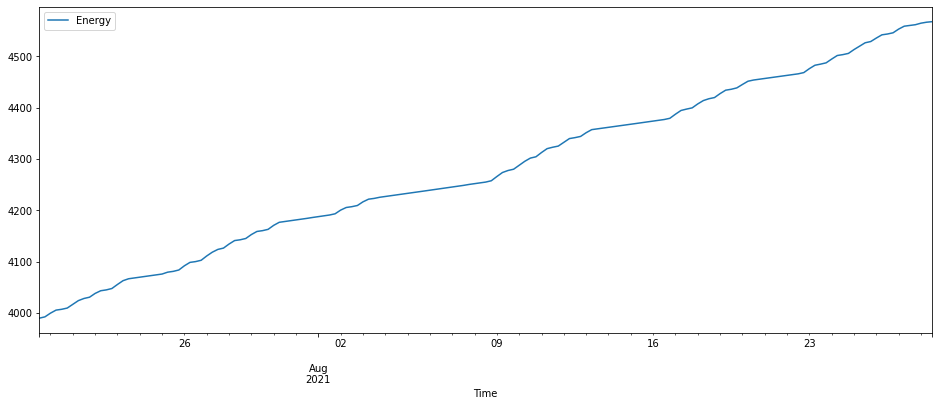

In [113]:
df3[['Energy']].plot(figsize=(16,6))

<AxesSubplot:xlabel='Time'>

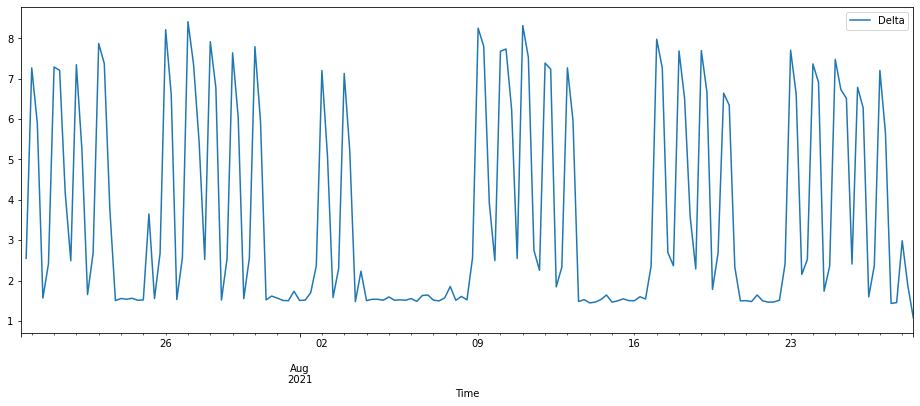

In [114]:
df3[['Delta']].plot(figsize=(16,6))

In [115]:
df3

,Date & Time,Energy,Delta
Time,,,
2021-07-19 12:00:00,1626717540,3989.844182,NaN
2021-07-19 18:00:00,1626739140,3992.393598,2.549417
2021-07-20 00:00:00,1626760740,3999.658504,7.264906
2021-07-20 06:00:00,1626782340,4005.553747,5.895243
2021-07-20 12:00:00,1626803940,4007.119762,1.566015
...,...,...,...
2021-08-27 12:00:00,1630087140,4559.816362,1.432622
2021-08-27 18:00:00,1630108740,4561.268319,1.451958
2021-08-28 00:00:00,1630130340,4564.252912,2.984592
